<a href="https://colab.research.google.com/github/baggio18-droid/ImageProcessingTasks/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


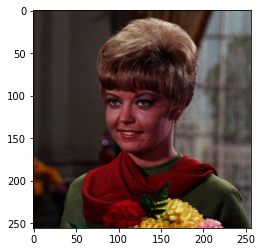

In [ ]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/Image/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


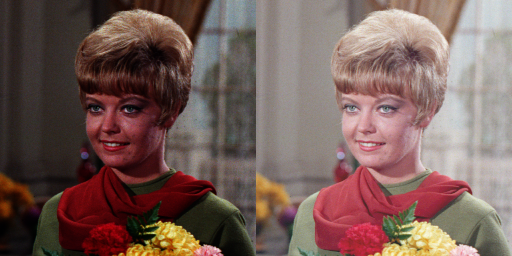

In [ ]:
#Task 1

original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c]/255,(1/gamma)), 0, 255);


final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Image Gamma correction 
----------------------------------
Enter bit depth value: 3


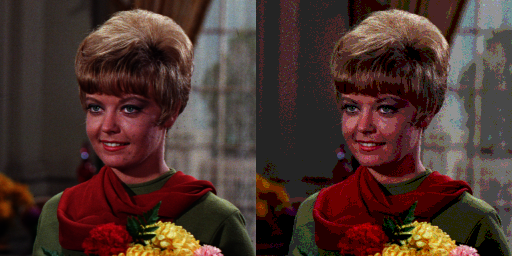

In [ ]:
# Task 2
original = cv.cvtColor(image,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

print(' Image Gamma correction ')
print('----------------------------------')
try:
  bd = float(input('Enter bit depth value: '))
except ValueError:
  print('Error, not a number')
bit=2**bd
level = 255/(bit-1)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c]/level)*level, 0, 255);

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Average Denoising
----------------------------------
Enter total image: 100


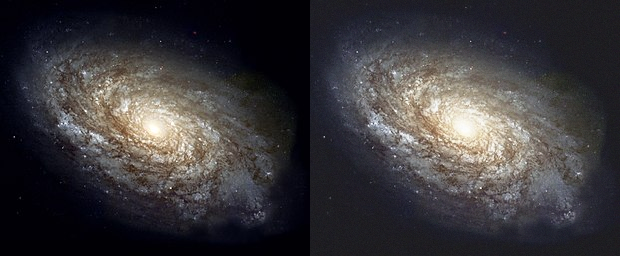

In [ ]:
#Task 3

import glob
from matplotlib import pyplot as plt
import cv2 as cv 
from math import log10, sqrt

print(' Average Denoising')
print('----------------------------------')
try:
  total = int(input('Enter total image: '))
except ValueError:
  print('Error, not a number')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Image/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)
img1 = cv.imread('/content/drive/MyDrive/Image/galaxy.jpg')
dst = cv_img[0]
for i in range(total):
  if i == 0:
    pass
  else:
    alpha = 1.0/(i + 1)
    beta = 1.0 - alpha
    dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)
def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(mse))
  return psnr
def main():
  img2 = dst
  value = PSNR(img1, img2)
  print(f"PSNR value is {value} dB")
 
if __name__== "_main_":
  main()
  
final_frame = cv.hconcat((img1,dst))
cv2_imshow(final_frame)

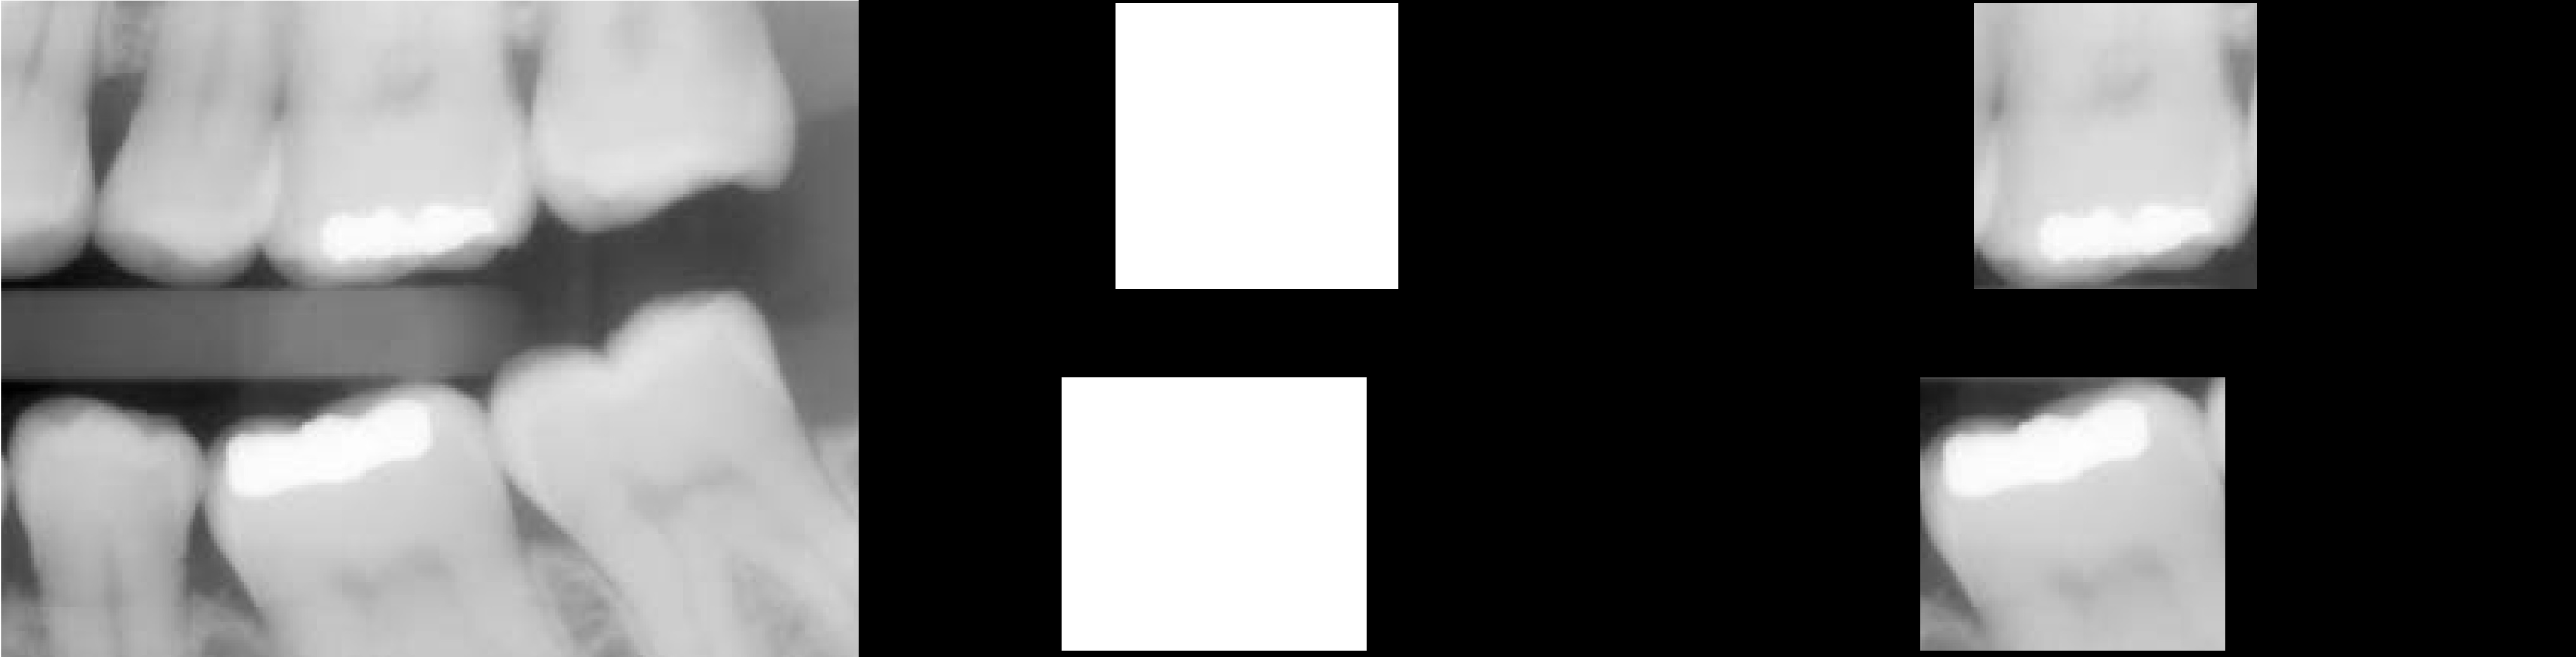

In [ ]:
# Task 4

import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread('/content/drive/MyDrive/Image/teeth.jpg')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask,pt1=(320,595),pt2=(800,1025),color=(255,255,255),thickness=-1)
result = img & mask

mask1 = cv.rectangle(mask,pt1=(405,5),pt2=(850,455),color=(255,255,255),thickness=-1)
result = img & mask1

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)